In [60]:
import tensorflow as tf
import numpy as np
device_name = tf.test.gpu_device_name()

file_name = "raw_with_maps" # or offsets_2

x_data = np.load(f"data/processed/x_{file_name}.npy")[:20]

x_data.shape


(20, 200, 16)

In [61]:
x_data = tf.convert_to_tensor(x_data)

In [70]:

import keras
width = 19
stride = 5

data = x_data[:10]

reconstruction = x_data[10:20]

reconstruction_loss = 0

for window in range(0, 200-width, stride):
    windowed_data = data[:,window:window+width,:]
    windowed_reconstruction = reconstruction[:,window:window+width,:]

    _mean_data = tf.math.reduce_mean(windowed_data, axis=-2)
    _mean_reconstruction = tf.math.reduce_mean(windowed_reconstruction, axis=-2)

    _std_data = tf.math.reduce_std(windowed_data, axis=-2)
    _std_reconstruction = tf.math.reduce_std(windowed_reconstruction, axis=-2)

    reconstruction_loss += tf.reduce_mean(keras.losses.mse(_mean_data, _mean_reconstruction))
    reconstruction_loss += tf.reduce_mean(keras.losses.mse(_std_data, _std_reconstruction))
    

reconstruction_loss = reconstruction_loss / len(data) / len(range(0, 200-width, stride)) / 2
print(reconstruction_loss)

tf.Tensor(106.3334113637404, shape=(), dtype=float64)


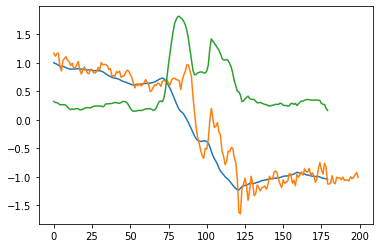

In [50]:
from matplotlib import pyplot as plt
plt.plot(means[:,0,0])
plt.plot(x_data[0,:,0])
plt.plot(3*stds[:,0,0])